In [1]:
import json, io
import twitter

In [7]:
import os
os.getcwd()

'C:\\Users\\00811289\\Documents\\gradschool\\pred452\\twitter\\mining-web-book\\ipynb'

In [2]:
CONSUMER_KEY = 'UvvZCCaLGcixv9ZCWWDigKarP'
CONSUMER_SECRET = 'vSRAUDT88kNeVOt2O1x1yi0jHeaR0foZkba4lnjoL6NbHUn0Tt'
OAUTH_TOKEN = '758714077401284608-Mf0OrF8FG11Ajdqh0tGgN3cIsv70m8n'
OAUTH_TOKEN_SECRET = 'IjVcfHVqvtB1hhXJuVx3ilDLyCP753gKB7x8a9NktbyeB'	

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print twitter_api

In [3]:
# Import unquote to prevent url encoding errors in next_results
from urllib import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#amtrak' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(15):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in unquote(next_results[1:]).split("&") ])    

    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

Length of statuses 84


In [5]:
print json.dumps(statuses[0], indent=1)

{
 "contributors": null, 
 "truncated": true, 
 "text": "More than half of Americans are avoiding Amtrak\nhttps://t.co/A07ZjS2FJ1 #AAPOR #MAPOE #drudge_report #amtrak\u2026 https://t.co/2lgmDBhVvx", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 964145637401837568, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [], 
  "hashtags": [
   {
    "indices": [
     72, 
     78
    ], 
    "text": "AAPOR"
   }, 
   {
    "indices": [
     79, 
     85
    ], 
    "text": "MAPOE"
   }, 
   {
    "indices": [
     86, 
     100
    ], 
    "text": "drudge_report"
   }, 
   {
    "indices": [
     101, 
     108
    ], 
    "text": "amtrak"
   }
  ], 
  "urls": [
   {
    "url": "https://t.co/A07ZjS2FJ1", 
    "indices": [
     48, 
     71
    ], 
    "expanded_url": "https://www.poll-vaulter.com/more-than-half-of-americans-are-avoiding-amtrak/#WAPOR", 
    "display_url": "poll-vaulter.com/more-than-half\u2026"
   }, 
   {
    "url": "https://t

In [9]:
def save_json(filename, data):
    with io.open('hello.json', 
                 'w', encoding='utf-8') as f:
        f.write(unicode(json.dumps(data, ensure_ascii=False)))

In [10]:
save_json('amtrak', statuses)

In [18]:
# Processing the data

In [11]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "More than half of Americans are avoiding Amtrak\nhttps://t.co/A07ZjS2FJ1 #AAPOR #MAPOE #drudge_report #amtrak\u2026 https://t.co/2lgmDBhVvx", 
 "RT @ABrindisiNY: I\u2019m at #UnionStation in #Utica to try and derail proposed #Amtrak cuts to the Northeast Corridor. https://t.co/7TkFPeqYbn", 
 "The Amtrak train arrived at the Austin station #austin #texas #train #amtrak https://t.co/w1RsRfrK3F https://t.co/FzHQGskeNQ", 
 "RT @shaunus67: So tomorrow we are off to Vancouver here\u2019s some pictures from Portland including the train journey #Amtrak #Portland https:/\u2026", 
 "Kema! Taxi! Heading off! Today\u2019s world... @AmtrakNEC wish me luck #katsucon2018 #amtrak"
]
[
 "ABrindisiNY", 
 "shaunus67", 
 "AmtrakNEC", 
 "Amtrak", 
 "RailPassengers"
]
[
 "AAPOR", 
 "MAPOE", 
 "drudge_report", 
 "amtrak", 
 "UnionStation"
]
[
 "More", 
 "than", 
 "half", 
 "of", 
 "Americans"
]


In [37]:
# Show most common words, screennames and hashtags

from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'the', 174), (u'#Amtrak', 174), (u'#amtrak', 155), (u'to', 127), (u'RT', 118), (u'train', 92), (u'on', 89), (u'in', 88), (u'a', 87), (u'for', 85)]

[(u'Amtrak', 44), (u'JDwithTW', 11), (u'LivingSafely', 9), (u'nytimes', 8), (u'smartstatistic', 7), (u'kurteichenwald', 7), (u'newnewspage', 6), (u'AllyNBCBoston', 6), (u'murrayontravel', 6), (u'GregRice1010', 6)]

[(u'Amtrak', 215), (u'amtrak', 162), (u'travel', 26), (u'train', 21), (u'LIRR', 14), (u'PennStation', 14), (u'trains', 13), (u'transit', 13), (u'Seattle', 12), (u'TIGER', 12)]



In [38]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.373600814072
0.434027777778
0.379403794038
15.9605568445


In [40]:
from prettytable import PrettyTable
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+--------------+----------------------------------------------------+
| Count | Screen Name  | Text                                               |
+-------+--------------+----------------------------------------------------+
| 130   | CGTNOfficial | RT @CGTNOfficial: More on #Amtrak train derailment |
|       |              | - at least three killed, about 100 hospitalized    |
|       |              | - this was the train's first passenger…            |
| 11    | vcstar       | RT @vcstar: Some relief for commuters: #Amtrak     |
|       |              | will add a roundtrip between LA and Santa Barbara  |
|       |              | as passengers continue to pack trains duri…        |
| 11    | vcstar       | RT @vcstar: Some relief for commuters: #Amtrak     |
|       |              | will add a roundtrip between LA and Santa Barbara  |
|       |              | as passengers continue to pack trains duri…        |
| 11    | JDwithTW     | RT @JDwithTW: Even if you zero out #TIG

Populating the interactive namespace from numpy and matplotlib


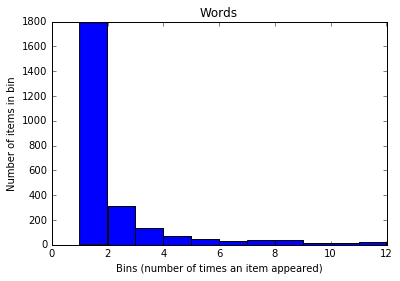

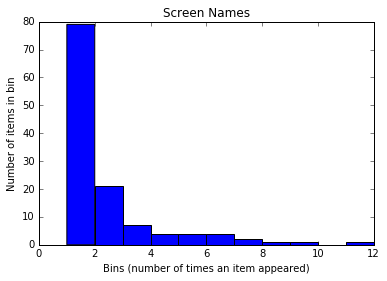

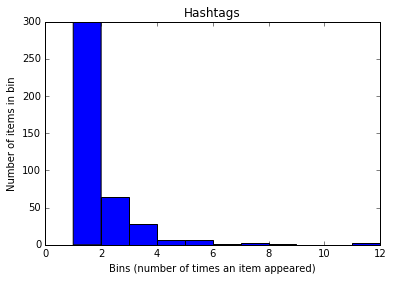

In [46]:
%pylab inline
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values(), bins=[1,2,3,4,5,6,7,8,9,10,11,12])
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()